## **AdaBoost**

AdaBoost (Adaptive Boosting) employs a sequential learning strategy where each new predictor corrects the mistakes of its predecessor by focusing more on the hard cases. This process involves adjusting the weights of training instances, increasing the relative weight of misclassified samples so that subsequent predictors prioritize them.

#### **Process of AdaBoost**

1) **Initialize Weights:**
    - All training instances start with equal weights.
2) **Train the First Base Classifier:**
    - A weak learner, such as a decision tree, is trained on the dataset using the initial weights.
3) **Evaluate and Update Weights:**
    - The performance of the classifier is evaluated on the training set.
    - Misclassified instances have their weights increased, while correctly classified ones have their weights reduced.
4) **Train the Next Classifier:**
    - Using the updated weights, the next classifier is trained, with more emphasis on the harder cases.
5) **Repeat the Process:**
    - Steps 3 and 4 are repeated for a predefined number of iterations or until the desired accuracy is achieved.
6) **Combine Predictors:**
    - The predictions of all classifiers are aggregated to form the final strong model, often through weighted voting.

This iterative adjustment ensures that new classifiers focus on the training instances that previous models struggled to handle. The resulting model is typically more accurate and robust.

#### **Example**

When using decision trees as base classifiers, AdaBoost builds a sequence of trees where each subsequent tree compensates for the shortcomings of the previous ones. The final prediction is a weighted majority vote of all trees.

This approach is visually depicted in Figure 7-7, where the focus shifts progressively to harder cases during training.

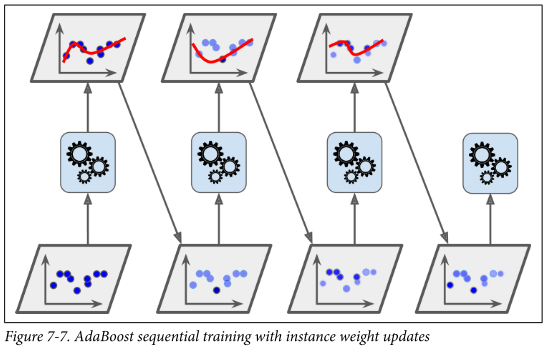



The described process illustrates how AdaBoost (Adaptive Boosting) works, particularly when applied to a dataset like the moons dataset using highly regularized SVM classifiers with an RBF kernel.

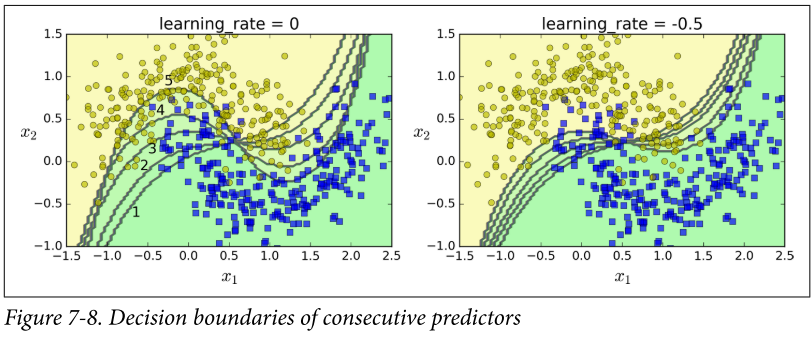

1. **Sequential Learning in AdaBoost**
    - **Initial Predictor:** The first predictor is trained on the dataset, but it misclassifies some instances.
    - **Weight Adjustment:** The misclassified instances' weights are increased, making them more significant in the subsequent predictor's training.
    - **Subsequent Predictors:** Each subsequent predictor focuses more on correcting the errors made by the previous ones, gradually improving the overall model performance.

2. **Decision Boundaries**
    - The decision boundaries evolve as new predictors are added:
        - The first predictor creates a general boundary that misclassifies some points.
        - The second predictor adjusts the boundary, focusing on the misclassified instances.
        - This process continues, resulting in a more refined decision boundary with each new predictor.

3. **Impact of Learning Rate**
    - The learning rate determines how much the weights of misclassified instances are adjusted:
        - **Full Learning Rate:** Misclassified weights are boosted significantly, leading to rapid adaptation but potential overfitting.
        - **Halved Learning Rate:** Weights are adjusted more conservatively, resulting in smoother, more gradual learning. This helps prevent overfitting and improves generalization.
    
4. **Similarity to Gradient Descent**
    - Like Gradient Descent, which minimizes a cost function by iteratively tweaking model parameters:
        - AdaBoost iteratively adds predictors, adjusting the ensemble's performance step by step.
        - Each step aims to minimize the weighted classification error.

5. **Key Takeaways**
    - AdaBoost is powerful for combining weak learners (e.g., regularized SVMs or decision stumps) into a strong ensemble.
    - The method's adaptive weighting ensures that the ensemble focuses on hard-to-classify instances, refining the model.
    - The learning rate is a critical hyperparameter that balances between rapid convergence and robust generalization.


Once all predictors are trained, the ensemble makes predictions very much like bagging or pasting, except that predictors have different weights depending on their overall accuracy on the weighted training set.

#### **Algorithm**

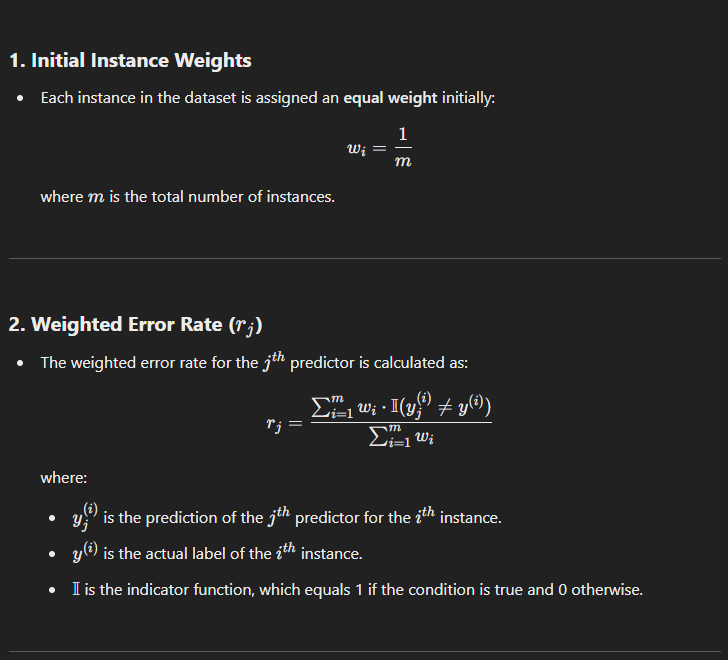
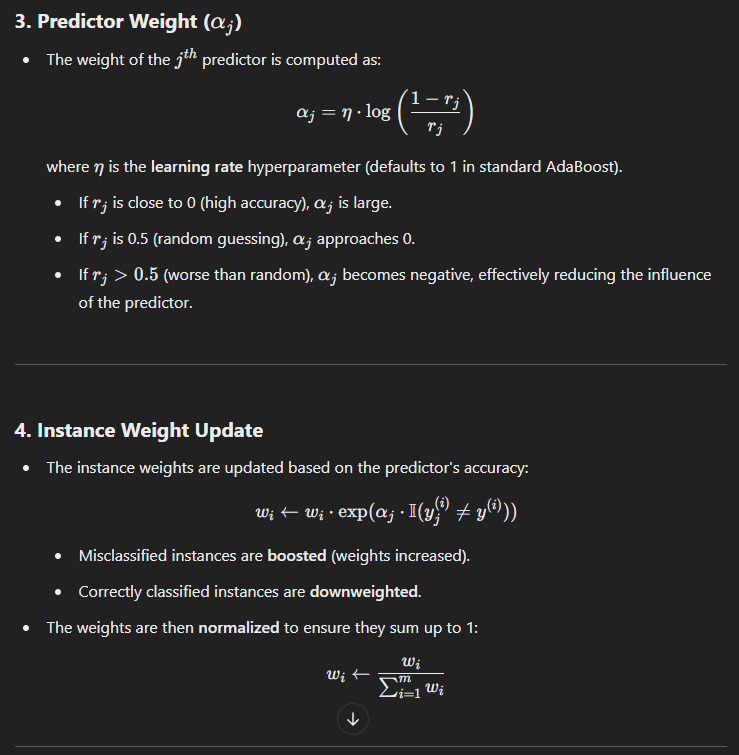
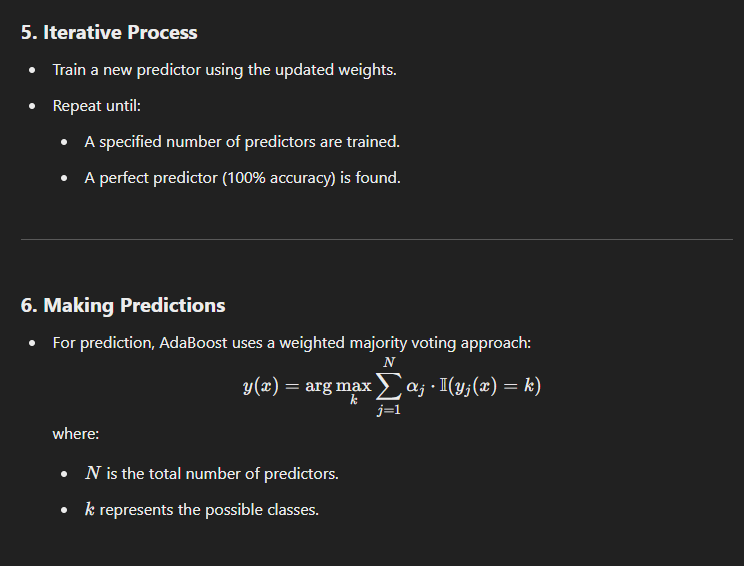


#### **Sklearn Variants**

1. **SAMME: (Stagewise Additive Modeling using the Multiclass Exponential loss function)**
    - A multiclass extension of AdaBoost.
    - Works with predictors that do not estimate probabilities.

2. **SAMME.R: (Stagewise Additive Modeling using the Multiclass Exponential loss function with Real-valued outputs)**
    - A variant that leverages predictors capable of estimating probabilities (via predict_proba).
    - Uses probabilities instead of discrete predictions for better performance.

#### **Code**

In [4]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
X, y=make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
ada_clf=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=500, algorithm='SAMME.R', learning_rate=0.5)

Lower learning rate (e.g., 0.5 ) can make the model more robust and help it generalize better by preventing any single weak learner from dominating the final decision.

Higher learning rate (e.g., 1 ) allows the model to focus more on the misclassified instances and can potentially lead to faster convergence, but with a risk of overfitting if the model becomes too sensitive to noisy or hard-to-classify data points.

In [8]:
ada_clf.fit(X_train, y_train)

C:\Users\arupp\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=500)

If your AdaBoost ensemble is overfitting the training set, you can try reducing the number of estimators or more strongly regularizing the base estimator.